In [1]:
import batoid
import os
import yaml
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

%autoreload 2

In [2]:
HSC_fn = os.path.join(batoid.datadir, "HSC", "HSC.yaml")
config = yaml.load(open(HSC_fn))
fiducial_telescope = batoid.parse.parse_optic(config['opticalSystem'])

[0.22652046732936743, -0.22652046732936743, -0.22652046732940101, 0.22652046732940101]


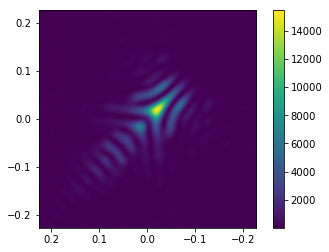

In [252]:
xextent = th1[0]*206265*psf.shape[0]*0.5*np.r_[-1, 1]
yextent = th2[1]*206265*psf.shape[1]*0.5*np.r_[-1, 1]
extent = [*xextent, *yextent]
print(extent)
plt.imshow(psf, extent=[*xextent, *yextent])
plt.colorbar()

In [231]:
import galsim

In [253]:
wcs = galsim.JacobianWCS(th1[0], th1[1], th2[0], th2[1])
g = wcs.getDecomposition()[1]
np.hypot(g.g1, g.g2)

0.035694593470890414

In [257]:
wcs.pixelArea() * (206265)**2 * psf.shape[0]**2

0.20498458361355176

In [277]:
alpha = 0.1
beta = 0.1
gamma = np.sqrt(1 - alpha**2 - beta**2)
testray = batoid.Ray(0,0,-1,alpha,beta,gamma)

In [278]:
p = batoid.Plane()

In [279]:
newray = p.intersect(testray)

In [280]:
print(newray.p0)

[  1.01015254e-01   1.01015254e-01  -1.11022302e-16]


In [283]:
u = np.sqrt(1-gamma**2)/gamma*alpha/np.sqrt(alpha**2+beta**2)
v = np.sqrt(1-gamma**2)/gamma*beta/np.sqrt(alpha**2+beta**2)

In [287]:
def dirCosToTanPlane(alpha, beta, gamma):
    u = alpha/gamma
    v = beta/gamma
    return u, v

In [288]:
def tanPlaneToDirCos(u, v):
    gamma = 1.0/np.sqrt(1.0+u**2+v**2)
    return gamma*u, gamma*v, gamma

In [299]:
alpha = 1.75*np.pi/180
beta = 0.
gamma = np.sqrt(1 - alpha**2 - beta**2)

tanPlaneToDirCos(*dirCosToTanPlane(alpha, beta, gamma))

(0.030543261909900768, 0.0, 0.99953344573951264)

In [302]:
180/np.pi*np.r_[dirCosToTanPlane(alpha, beta, gamma)]

array([ 1.75081685,  0.        ])